<a href="https://colab.research.google.com/github/NagrajSrivatsa15/FakeNewsML/blob/main/Fake_news_detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing depedencies and libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#dowloading stopwords to eliminate words like youre, at, that, this............
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Lets print the words 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
pwd

'/content'

In [ ]:
#dataset
fake_real_dataset=pd.read_csv('/content/train.csv')

In [ ]:
fake_real_dataset.shape

(20800, 5)

In [ ]:
fake_real_dataset.head

<bound method NDFrame.head of           id  ... label
0          0  ...     1
1          1  ...     0
2          2  ...     1
3          3  ...     1
4          4  ...     1
...      ...  ...   ...
20795  20795  ...     0
20796  20796  ...     0
20797  20797  ...     0
20798  20798  ...     1
20799  20799  ...     1

[20800 rows x 5 columns]>

In [ ]:
fake_real_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
fake_real_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

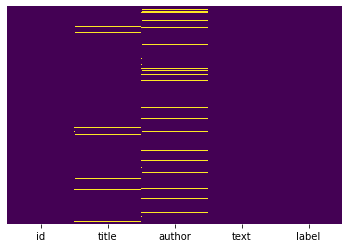

In [ ]:
sns.heatmap(fake_real_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

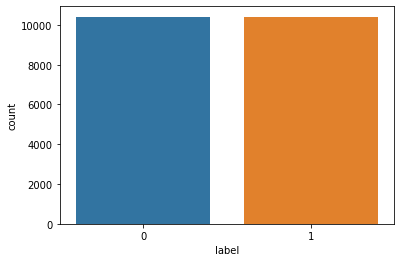

In [ ]:
fake_real_dataset['label'].value_counts()

sns.countplot(x = 'label',data=fake_real_dataset)

In [ ]:
#Null values replaced by empty string
fake_real_dataset=fake_real_dataset.fillna('')

In [ ]:
fake_real_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

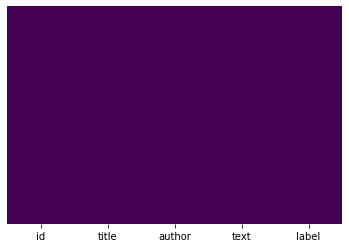

In [ ]:
sns.heatmap(fake_real_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

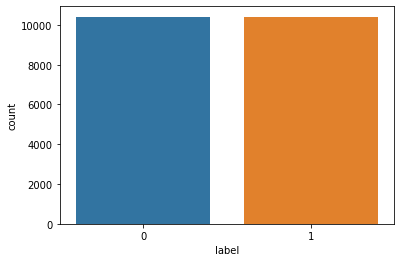

In [ ]:
sns.countplot(x = 'label',data=fake_real_dataset)

In [ ]:
fake_real_dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
#Now in the dataset we have 4 main columns title, author, text and label(0/1)
#lets merge title and author into one column for the prediction
fake_real_dataset['Author_title']= fake_real_dataset['author']+' '+fake_real_dataset['title']
print(fake_real_dataset['Author_title'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: Author_title, Length: 20800, dtype: object


In [ ]:
X_label_dropped=fake_real_dataset.drop('label',axis=1)
Y_label_storage=fake_real_dataset['label']

In [ ]:
print(Y_label_storage)
print(X_label_dropped)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64
          id  ...                                       Author_title
0          0  ...  Darrell Lucus House Dem Aide: We Didn’t Even S...
1          1  ...  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2          2  ...  Consortiumnews.com Why the Truth Might Get You...
3          3  ...  Jessica Purkiss 15 Civilians Killed In Single ...
4          4  ...  Howard Portnoy Iranian woman jailed for fictio...
...      ...  ...                                                ...
20795  20795  ...  Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796  20796  ...  Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797  20797  ...  Michael J. de la Merced and Rachel Abrams Macy...
20798  20798  ...  Alex Ansary NATO, Russia To Hold Parallel Exer...
20799  20799  ...            David Swanson What Keeps the F-35 Alive

[20800 ro

In [ ]:
#removing all the prefix and suffix using stemmer
stem_dataset=PorterStemmer()

In [ ]:
#defining a function for stemming and exlcluding the stop words in the dataset and eliminating the numbers,special characters
#using regular expression

def stemming(Dataset):
    Stemmed_Dataset=re.sub('[^a-zA-Z]',' ',Dataset)
    Stemmed_Dataset=Stemmed_Dataset.lower()
    Stemmed_Dataset=Stemmed_Dataset.split()
    #Now lets stemm the dataset plus eliminate all the stop words using for loop
    Stemmed_Dataset = [stem_dataset.stem(word) for word in Stemmed_Dataset if not word in stopwords.words('english')]
    Stemmed_Dataset = ' '.join(Stemmed_Dataset)
    return Stemmed_Dataset

In [ ]:
# apply the stemmed dataset to the real dataset
fake_real_dataset['Author_title'] = fake_real_dataset['Author_title'].apply(stemming)

In [ ]:
print(fake_real_dataset['Author_title'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: Author_title, Length: 20800, dtype: object


In [ ]:
X=fake_real_dataset['Author_title'].values
Y=fake_real_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer=TfidfVectorizer()
Vectorizer.fit(X)
X=Vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [ ]:
#splitting the dataset to training and test data--------LR
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=4)

#Logistic Regression

In [ ]:
#Our first model -Logistic Regression
#Training the models:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [ ]:
LR_model.fit(X_train,Y_train)
LR_Train_Prediction = LR_model.predict(X_train)
print(LR_Train_Prediction)

[0 0 1 ... 1 1 0]


In [ ]:
#Classification report
print('Classification report')
print(classification_report(Y_train,LR_Train_Prediction))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,LR_Train_Prediction))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8310
           1       0.98      0.99      0.99      8330

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



Confusion matrix
[[8142  168]
 [  47 8283]]


In [ ]:
prediction_LR_Test = LR_model.predict(X_test)
print(prediction_LR_Test)


[0 1 1 ... 1 0 0]


In [ ]:
print('Classification report')
print(classification_report(Y_test,prediction_LR_Test))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_test,prediction_LR_Test))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2077
           1       0.96      0.99      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



Confusion matrix
[[1989   88]
 [  19 2064]]


Text(24.0, 0.5, 'Truth')

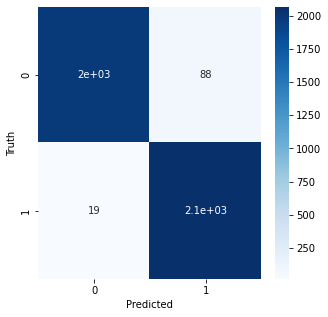

In [ ]:
#Confusion Matrix

import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,prediction_LR_Test)
import seaborn as sn
plt.figure(figsize=(5,5))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Performance metrics:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction_LR_Test)*100
print(f'model accuracy is : {accuracy.round()} %')

model accuracy is : 97.0 %


In [ ]:
from sklearn.metrics import f1_score
score = f1_score(Y_test,prediction_LR_Test, average='binary')
print('F-Measure for LR : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,prediction_LR_Test, average='binary')
print('Recall for LR: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,prediction_LR_Test, average='binary')
print('Precision for LR: %.3f' % precision)

F-Measure for LR : 0.975
Recall for LR: 0.991
Precision for LR: 0.959


#CV Method

In [ ]:
log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X, Y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())

[0.97932692 0.97692308 0.97692308 0.97596154 0.98221154 0.97740385
 0.97932692 0.97788462 0.97596154 0.97884615]
0.9780769230769231


Text(24.0, 0.5, 'Truth')

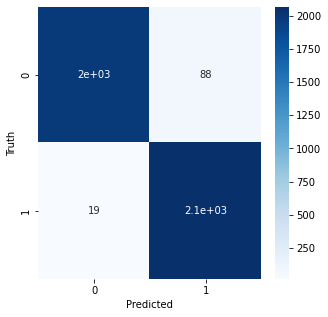

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,prediction_LR_Test)
import seaborn as sn
plt.figure(figsize=(5,5))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction_LR_Test)*100
print(f'model accuracy is : {accuracy.round()} %')

model accuracy is : 97.0 %


In [ ]:
from sklearn.metrics import f1_score
score = f1_score(Y_test,prediction_LR_Test, average='binary')
print('F-Measure for LR : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,prediction_LR_Test, average='binary')
print('Recall for LR: %.3f' % recall)

from sklearn.metrics import precision_score
precision = precision_score(Y_test,prediction_LR_Test, average='binary')
print('Precision for LR: %.3f' % precision)

F-Measure for LR : 0.975
Recall for LR: 0.991
Precision for LR: 0.959


#Support vector Machine

In [ ]:
from sklearn import svm
SVM_model=svm.SVC(kernel='linear')
SVM_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
SVM_train_Predcition=SVM_model.predict(X_train)
print(SVM_train_Predcition)

[0 0 1 ... 1 1 0]


In [ ]:
#Training
print('Classification report')
print(classification_report(Y_train,SVM_train_Predcition))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,SVM_train_Predcition))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8310
           1       1.00      1.00      1.00      8330

    accuracy                           1.00     16640
   macro avg       1.00      1.00      1.00     16640
weighted avg       1.00      1.00      1.00     16640



Confusion matrix
[[8294   16]
 [  30 8300]]


In [ ]:
#testing
SVM_test_Predcition=SVM_model.predict(X_test)
print(SVM_test_Predcition)

[0 1 1 ... 1 0 0]


In [ ]:
#Classification Report
print('Classification report')
print(classification_report(Y_test,SVM_test_Predcition))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_test,SVM_test_Predcition))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



Confusion matrix
[[2051   26]
 [   8 2075]]


#CV Method SVM

In [ ]:
model=svm.SVC(kernel='linear')
scores = cross_val_score(model, X, Y , cv = 10, scoring= 'accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.00


Text(24.0, 0.5, 'Truth')

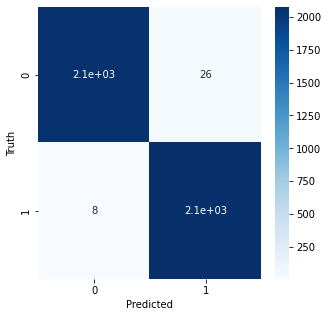

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,SVM_test_Predcition)
import seaborn as sn
plt.figure(figsize=(5,5))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,SVM_test_Predcition)*100
print(f'model accuracy is : {accuracy.round()} %')

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,SVM_test_Predcition, average='binary')
print('F-Measure for SVM : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,SVM_test_Predcition, average='binary')
print('Recall for SVM: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,SVM_test_Predcition, average='binary')
print('Precision for SVM: %.3f' % precision)

model accuracy is : 99.0 %
F-Measure for SVM : 0.992
Recall for SVM: 0.996
Precision for SVM: 0.988


#Decesion Tree


In [ ]:
#Decesion Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_model = DecisionTreeClassifier()

In [ ]:
DT_model.fit(X_train,Y_train)
dt_train_prediction = DT_model.predict(X_train)
print(dt_train_prediction)


[0 0 1 ... 1 1 0]


In [ ]:
#Classifcation Report:

print('Classification report')
print(classification_report(Y_train,dt_train_prediction))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,dt_train_prediction))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8310
           1       1.00      1.00      1.00      8330

    accuracy                           1.00     16640
   macro avg       1.00      1.00      1.00     16640
weighted avg       1.00      1.00      1.00     16640



Confusion matrix
[[8310    0]
 [   0 8330]]


In [ ]:
#testing dataset
dt_prediction_test = DT_model.predict(X_test)
print(dt_prediction_test)

In [ ]:
print('Classification report')
print(classification_report(Y_test,dt_prediction_test))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_test,dt_prediction_test))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



Confusion matrix
[[2057   20]
 [   8 2075]]


Text(24.0, 0.5, 'Truth')

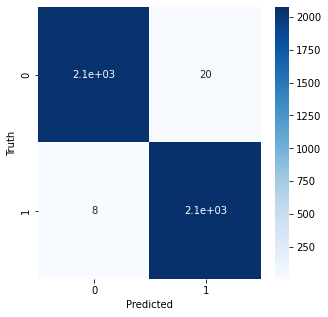

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,dt_prediction_test)
import seaborn as sn
plt.figure(figsize=(5,5))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,dt_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,dt_prediction_test, average='binary')
print('F-Measure for DT : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,dt_prediction_test, average='binary')
print('Recall for DT: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,dt_prediction_test, average='binary')
print('Precision for DT: %.3f' % precision)

model accuracy is : 99.0 %
F-Measure for DT : 0.993
Recall for DT: 0.996
Precision for DT: 0.990


#CV Method -DT

In [ ]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, Y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


[0.99615385 0.99471154 0.99230769 0.99519231 0.99375    0.99375
 0.99423077 0.99134615 0.99182692 0.99134615]
0.9934615384615386
0.99 accuracy with a standard deviation of 0.00


Text(51.0, 0.5, 'Truth')

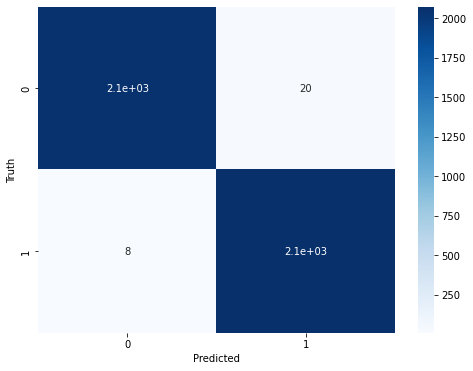

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,dt_prediction_test)
import seaborn as sn
plt.figure(figsize=(8,6))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,dt_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,dt_prediction_test, average='binary')
print('F-Measure for DT : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,dt_prediction_test, average='binary')
print('Recall for DT: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,dt_prediction_test, average='binary')
print('Precision for DT: %.3f' % precision)

model accuracy is : 99.0 %
F-Measure for DT : 0.993
Recall for DT: 0.996
Precision for DT: 0.990


#Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
rf_prediction_train = rf.predict(X_train)
print(rf_prediction_train)

[0 0 1 ... 1 1 0]


In [ ]:
#classification Report
print('Classification report')
print(classification_report(Y_train,rf_prediction_train))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,rf_prediction_train))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8310
           1       1.00      1.00      1.00      8330

    accuracy                           1.00     16640
   macro avg       1.00      1.00      1.00     16640
weighted avg       1.00      1.00      1.00     16640



Confusion matrix
[[8310    0]
 [   0 8330]]


In [ ]:
rf_prediction_test = rf.predict(X_test)
print(rf_prediction_test)

[0 1 1 ... 1 0 0]


In [ ]:
#classification Report
print('Classification report')
print(classification_report(Y_test,rf_prediction_test))
print('\n')
print('Confission matrix')
print(confusion_matrix(Y_test,rf_prediction_test))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



Confission matrix
[[2052   25]
 [   4 2079]]


Text(24.0, 0.5, 'Truth')

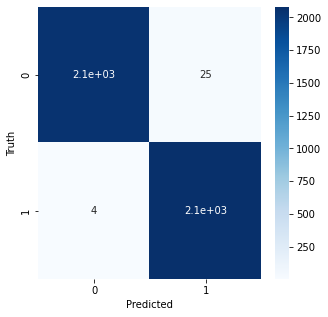

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,rf_prediction_test)
import seaborn as sn
plt.figure(figsize=(5,5))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,rf_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,rf_prediction_test, average='binary')
print('F-Measure for Random Forest : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,rf_prediction_test, average='binary')
print('Recall for Random Forest: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,rf_prediction_test, average='binary')
print('Precision for Random Forest: %.3f' % precision)

model accuracy is : 99.0 %
F-Measure for Random Forest : 0.993
Recall for Random Forest: 0.998
Precision for Random Forest: 0.988


#CV Method

In [ ]:
#CV method
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, Y , cv = 10, scoring= 'accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.00


In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,rf_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,rf_prediction_test, average='binary')
print('F-Measure for Random Forest : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,rf_prediction_test, average='binary')
print('Recall for Random Forest: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,rf_prediction_test, average='binary')
print('Precision for Random Forest: %.3f' % precision)

model accuracy is : 99.0 %
F-Measure for Random Forest : 0.993
Recall for Random Forest: 0.998
Precision for Random Forest: 0.988


#XG-BOOST

In [ ]:
from xgboost import XGBClassifier
modelXG=XGBClassifier()

In [ ]:
modelXG.fit(X_train,Y_train)
xg_prediction_Train = modelXG.predict(X_train)
print(xg_prediction_Train)

[0 0 1 ... 1 1 0]


In [ ]:
#classification Report
print('Classification report')
print(classification_report(Y_train,xg_prediction_Train))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,xg_prediction_Train))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8310
           1       0.93      1.00      0.96      8330

    accuracy                           0.96     16640
   macro avg       0.96      0.96      0.96     16640
weighted avg       0.96      0.96      0.96     16640



Confusion matrix
[[7669  641]
 [  16 8314]]


In [ ]:
XG_prediction_test = modelXG.predict(X_test)
print(XG_prediction_test)

[0 1 1 ... 1 0 0]


In [ ]:
print('Classification report')
print(classification_report(Y_test,XG_prediction_test))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_test,XG_prediction_test))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2077
           1       0.92      1.00      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



Confusion matrix
[[1901  176]
 [   3 2080]]


Text(24.0, 0.5, 'Truth')

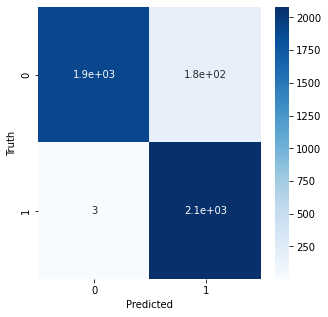

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,XG_prediction_test)
import seaborn as sn
plt.figure(figsize=(5,5))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,XG_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test,XG_prediction_test))
print("RMSE: %f" % (rmse))

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,XG_prediction_test, average='binary')
print('F-Measure for XGBOOST : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,XG_prediction_test, average='binary')
print('Recall for XGBOOST: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,XG_prediction_test, average='binary')
print('Precision for XGBOOST: %.3f' % precision)

model accuracy is : 96.0 %
RMSE: 0.207434
F-Measure for XGBOOST : 0.959
Recall for XGBOOST: 0.999
Precision for XGBOOST: 0.922


In [ ]:
#CV method
modelXG.fit(X_train,Y_train)
scores = cross_val_score(modelXG, X, Y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.95384615 0.94615385 0.95721154 0.95817308 0.96153846 0.96394231
 0.95528846 0.95096154 0.94903846 0.95528846]
0.9551442307692308
0.96 accuracy with a standard deviation of 0.01


In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,XG_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test,XG_prediction_test))
print("RMSE: %f" % (rmse))

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,XG_prediction_test, average='binary')
print('F-Measure for XGBOOST : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,XG_prediction_test, average='binary')
print('Recall for XGBOOST: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,XG_prediction_test, average='binary')
print('Precision for XGBOOST: %.3f' % precision)

model accuracy is : 96.0 %
RMSE: 0.207434
F-Measure for XGBOOST : 0.959
Recall for XGBOOST: 0.999
Precision for XGBOOST: 0.922


#KNN Algorithm for prediction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
KNN_prediction = knn.predict(X_train)
print(KNN_prediction)

[1 1 1 ... 1 1 1]


In [ ]:
print('Classification report')
print(classification_report(Y_train,KNN_prediction))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,KNN_prediction))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.17      0.29      8310
           1       0.55      1.00      0.71      8330

    accuracy                           0.59     16640
   macro avg       0.77      0.59      0.50     16640
weighted avg       0.77      0.59      0.50     16640



Confusion matrix
[[1430 6880]
 [   1 8329]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
KNN_prediction_test = knn.predict(X_test)
print(KNN_prediction_test)

[1 1 1 ... 1 1 1]


In [ ]:
print('Classification report')
print(classification_report(Y_test,KNN_prediction_test))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_test,KNN_prediction_test))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.07      0.14      2077
           1       0.52      1.00      0.68      2083

    accuracy                           0.54      4160
   macro avg       0.76      0.54      0.41      4160
weighted avg       0.76      0.54      0.41      4160



Confusion matrix
[[ 155 1922]
 [   0 2083]]


Text(24.0, 0.5, 'Truth')

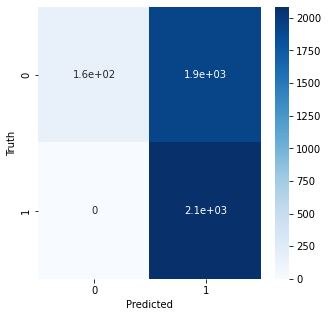

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,KNN_prediction_test)
import seaborn as sn
plt.figure(figsize=(5,5))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,KNN_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,KNN_prediction_test, average='binary')
print('F-Measure for KNN : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,KNN_prediction_test, average='binary')
print('Recall for KNN: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,KNN_prediction_test, average='binary')
print('Precision for KNN: %.3f' % precision)

model accuracy is : 54.0 %
F-Measure for KNN : 0.684
Recall for KNN: 1.000
Precision for KNN: 0.520


#CV Method

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X, Y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.52211538 0.52259615 0.52403846 0.51634615 0.52067308 0.51538462
 0.51730769 0.51875    0.52019231 0.52019231]
0.5197596153846155
0.52 accuracy with a standard deviation of 0.00


In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,KNN_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,KNN_prediction_test, average='binary')
print('F-Measure for KNN : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,KNN_prediction_test, average='binary')
print('Recall for KNN: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,KNN_prediction_test, average='binary')
print('Precision for KNN: %.3f' % precision)

model accuracy is : 54.0 %
F-Measure for KNN : 0.684
Recall for KNN: 1.000
Precision for KNN: 0.520


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.52 accuracy with a standard deviation of 0.00
